# **Chicago Crime Data vs Weather - 2016** 

In [116]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [140]:
# Read csv's to be used for this assignment
crime_categories = pd.read_csv('CrimeCategories.csv')
weather = pd.read_csv('temperature_2016.csv')
crime = pd.read_csv('Crime_data_2016.csv')

In [141]:
# Extract the month from our date field for use with future plot
crime['Month']= pd.DatetimeIndex(crime['ShortDate']).month

crime.head()

,Unnamed: 0,Case Number,Primary Type,Date,ShortDate,Hour,Year,DateConvert,Month
0,646621,JA119772,THEFT,12/31/2016 23:59,12/31/2016,23,2016,4270523,12
1,646622,JA100016,BATTERY,12/31/2016 23:58,12/31/2016,23,2016,4270523,12
2,646623,JA100012,BATTERY,12/31/2016 23:55,12/31/2016,23,2016,4270523,12
3,646624,JA100027,LIQUOR LAW VIOLATION,12/31/2016 23:55,12/31/2016,23,2016,4270523,12
4,646625,JA100839,CRIMINAL DAMAGE,12/31/2016 23:54,12/31/2016,23,2016,4270523,12


#### Here we merge our weather and crime data then convert the ShortDate back into datetime format

In [119]:
df = pd.merge(weather, crime, on =['ShortDate','Hour'])
df['ShortDate'] = pd.to_datetime(df['ShortDate'],format='%m/%d/%Y')
print(df['ShortDate'].dtype)

datetime64[ns]


###### Merge the crime and weather table with our crime categories

In [120]:
crime_categories.rename(columns={'crime primary type':'Primary Type'},inplace=True)
combined_df = df.merge(crime_categories, how='inner',on='Primary Type')

#### Need to set up bins to break our data up into smaller groups. First determine max and min to determine bin grouping

In [121]:
maxTemp = combined_df['Temp_Farenheit'].max()
minTemp = combined_df['Temp_Farenheit'].min()
print(f"The max temp is: {maxTemp}\nThe min temp is {minTemp}")

The max temp is: 91.634
The min temp is -9.777999999999999


#### Remove duplicate columns to keep dataframe clean

In [122]:
del combined_df['DateConvert_x']
del combined_df['Unnamed: 0']
del combined_df['DateConvert_y']
del combined_df['Date']

In [123]:
combined_df.head()

,datetime,ShortDate,Hour,Chicago,Temp_Farenheit,Case Number,Primary Type,Year,Month,bucket
0,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100075,BATTERY,2016,Jan,Personal
1,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100077,BATTERY,2016,Jan,Personal
2,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100044,BATTERY,2016,Jan,Personal
3,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ122194,BATTERY,2016,Jan,Personal
4,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100062,BATTERY,2016,Jan,Personal


In [124]:
bins = [-15,-5,5,15,25,35,45,55,65,75,85,95]
tempName = ['< -5 degrees',
            '-5 to 4.9 degrees',
            '5 to 14.9 degrees',
            '15 to 24.9 degrees',
            '25 to 34.9 degrees',
            '35 to 44.9 degrees',
            '45 to 54.9 degrees',
            '55 to 64.9 degrees',
            '65 to 74.9 degrees',
            '75 to 84.9 degrees',
            '85 to 95 degrees']
combined_df['TempBucket'] = pd.cut(combined_df['Temp_Farenheit'],bins,labels=tempName)
combined_df.head()

,datetime,ShortDate,Hour,Chicago,Temp_Farenheit,Case Number,Primary Type,Year,Month,bucket,TempBucket
0,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100075,BATTERY,2016,Jan,Personal,25 to 34.9 degrees
1,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100077,BATTERY,2016,Jan,Personal,25 to 34.9 degrees
2,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100044,BATTERY,2016,Jan,Personal,25 to 34.9 degrees
3,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ122194,BATTERY,2016,Jan,Personal,25 to 34.9 degrees
4,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100062,BATTERY,2016,Jan,Personal,25 to 34.9 degrees


#### Prep data for scatter plot of total crime over temp

Text(0.5, 1.0, 'Temperature and Crime count by types')

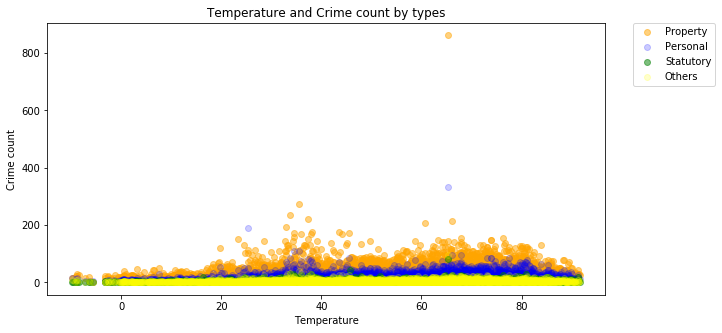

In [237]:

scatter_df = pd.pivot_table(combined_df,values='Case Number', index='Temp_Farenheit',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
scat_x = scatter_df.index.tolist()

Oth_scat = scatter_df[scatter_df.columns[0]]
Pers_scat = scatter_df[scatter_df.columns[1]]
Prop_scat = scatter_df[scatter_df.columns[2]]
Stat_scat = scatter_df[scatter_df.columns[3]]
# # scatter_df.to_csv(r'C:\Users\tepa7\Desktop\File Name.csv')
# ax = plt.plot(kind='scatter', x=scat_x, y=Oth_scat)
# plt.plot(scat_x,PersDF)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(scat_x, Prop_scat, 
        color = 'orange',
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,  
        label = 'Property')
ax.plot(scat_x, Pers_scat, 
        color = 'blue',
        linestyle='',
        marker='o',  
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Personal')
ax.plot(scat_x, Stat_scat, 
        color = 'green', 
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,
        label = 'Statutory')
ax.plot(scat_x, Oth_scat, 
        color = 'yellow', 
        linestyle='',
        marker='o', 
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Others')

# Incorporate the graph properties
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Temperature")
plt.ylabel("Crime count")
plt.title('Temperature and Crime count by types')

#### Updated the y-limit to remove the one outlier of 800+ crime commited

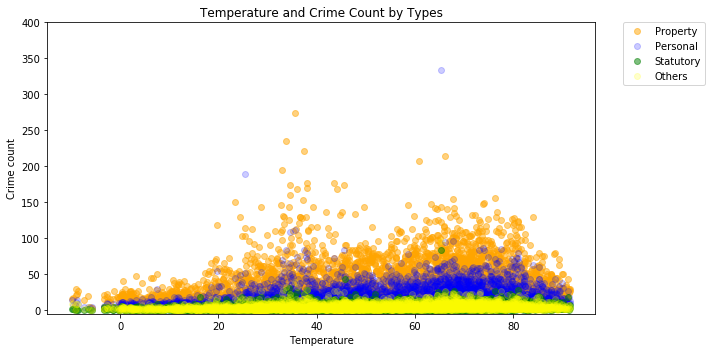

In [262]:
# Build the Scatter Plot 

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(scat_x, Prop_scat, 
        color = 'orange',
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,  
        label = 'Property')
ax.plot(scat_x, Pers_scat, 
        color = 'blue',
        linestyle='',
        marker='o',  
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Personal')
ax.plot(scat_x, Stat_scat, 
        color = 'green', 
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,
        label = 'Statutory')
ax.plot(scat_x, Oth_scat, 
        color = 'yellow', 
        linestyle='',
        marker='o', 
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Others')

# Incorporate the graph properties
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Temperature")
plt.ylabel("Crime count")
plt.title('Temperature and Crime Count by Types')
ax.set_ylim(-5,400)
plt.tight_layout()
plt.savefig('TempAndCrimebyType_Scatter.png')

#### Create the pivot table and print to determine the column indices so we can extract a series for our line chart

In [138]:
mon_buckets = pd.pivot_table(combined_df,values='Case Number',
                         index='Month',
                         columns='bucket', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
mon_buckets.head(12)

bucket,Other,Personal,Property,Statutory
Month,,,,
Apr,1701,6007,11555,1854
Aug,1742,6923,14913,1275
Dec,1498,5097,12715,1037
Feb,1512,5161,10443,1573
Jan,1524,5543,12164,1407
Jul,1777,6964,14444,1637
Jun,1766,7272,13223,1760
Mar,1801,6423,11918,1871
May,1841,7052,12749,1847


In [132]:
buckets = pd.pivot_table(combined_df,values='Case Number',
                         index='TempBucket',
                         columns='bucket', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets.head()

bucket,Other,Personal,Property,Statutory
TempBucket,,,,
< -5 degrees,51,79,180,8
-5 to 4.9 degrees,179,520,1392,141
5 to 14.9 degrees,391,1310,2937,306
15 to 24.9 degrees,1005,3233,7532,902
25 to 34.9 degrees,2439,8613,19144,2249


In [238]:
OthDF = buckets[buckets.columns[0]]
PersDF = buckets[buckets.columns[1]]
PropDF = buckets[buckets.columns[2]]
StatDF = buckets[buckets.columns[3]]
x = buckets.index.tolist()

['< -5 degrees',
 '-5 to 4.9 degrees',
 '5 to 14.9 degrees',
 '15 to 24.9 degrees',
 '25 to 34.9 degrees',
 '35 to 44.9 degrees',
 '45 to 54.9 degrees',
 '55 to 64.9 degrees',
 '65 to 74.9 degrees',
 '75 to 84.9 degrees',
 '85 to 95 degrees']

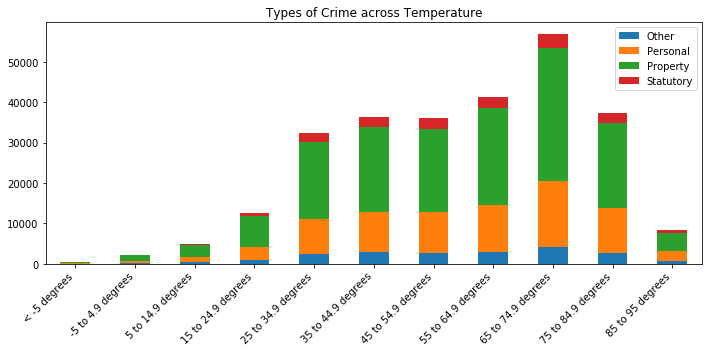

In [258]:

ax = buckets[['Other','Personal','Property','Statutory']].plot(kind='bar', stacked=True,figsize=(10, 5))
plt.xticks(rotation=45, ha='right')
ax.set_title('Types of Crime across Temperature')
plt.xlabel(None)
ax.legend(['Other','Personal','Property','Statutory']);
plt.tight_layout()
plt.savefig('TypeofCrimeBar.png')

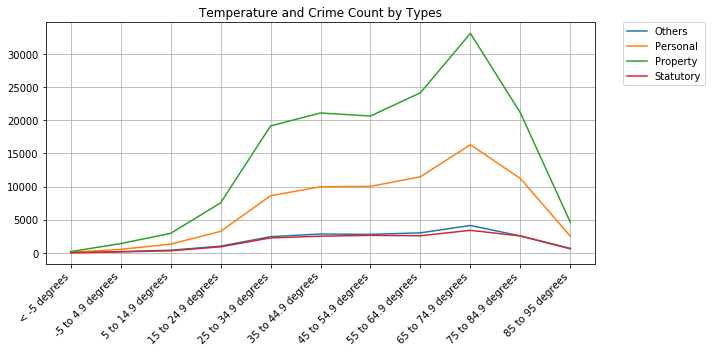

In [259]:
plt.figure(figsize=(10,5))
plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal' )
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45, ha='right')
plt.title('Temperature and Crime Count by Types')
plt.grid()
plt.tight_layout()
plt.savefig('TempAndCrimebyType_Line.png')



In [ ]:
plt.plot(x,PersDF, label = 'Personal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45,ha='right')

In [ ]:
# t = arange(0.0, 2.0, 0.01)
# s = sin(2.5*pi*t)
# plot(t, s)

# xlabel('time (s)')
# ylabel('voltage (mV)')
# title('Sine Wave')
# grid(True)
# show()

In [ ]:
plt.plot(x,PropDF,label = 'Property')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

In [ ]:
plt.plot(x,StatDF,label= 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

In [ ]:
#pivot by month

buckets_month = pd.pivot_table(combined_df,values='Case Number', index='Month',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_month

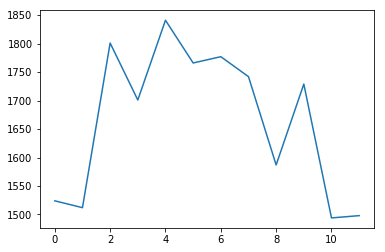

In [209]:
#plot crime by month
OthDF = buckets_month[buckets_month.columns[0]]
PersDF = buckets_month[buckets_month.columns[1]]
PropDF = buckets_month[buckets_month.columns[2]]
StatDF = buckets_month[buckets_month.columns[3]]
# x = buckets_month.index.tolist()
x= np.arange(12)
plt.plot(x,OthDF,label = 'Others')

([<matplotlib.axis.XTick at 0x176a8c99e80>,
 <a list of 12 Text xticklabel objects>)

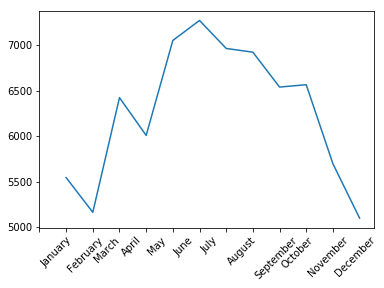

In [164]:
plt.plot(x,PersDF,label = 'Personal')
plt.xticks(np.arange(12), calendar.month_name[1:13],rotation=45,ha='left')

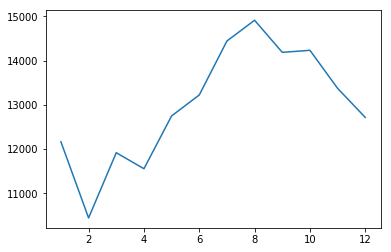

In [152]:
plt.plot(x,PropDF,label = 'Property')

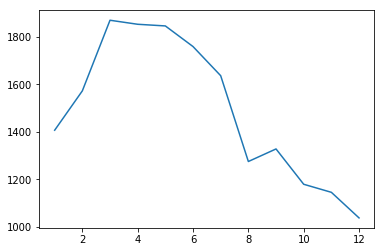

In [153]:
plt.plot(x,StatDF,label = 'Statutory')

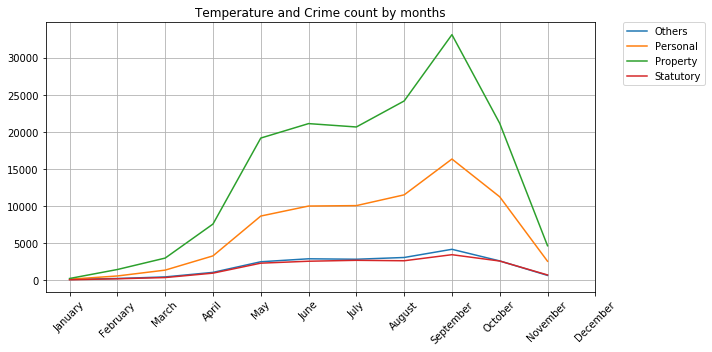

In [260]:
plt.figure(figsize=(10,5))
plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal')
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime count by months')
plt.xticks(np.arange(12), calendar.month_name[1:13],rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('TempAndCrimebyMonths_Line.png')


In [ ]:
#pivot by hours
buckets_hour = pd.pivot_table(combined_df,values='Case Number', index='Hour',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_hour.head()

In [ ]:
#Bar Charts of crimes inside respective buckets
Personal_df=combined_df.loc[combined_df["bucket"]=="Personal"]
Property_df=combined_df.loc[combined_df["bucket"]=="Property"]
Statutory_df=combined_df.loc[combined_df["bucket"]=="Statutory"]
Other_df=combined_df.loc[combined_df["bucket"]=="Other"]


In [ ]:
Personalbuckets = pd.pivot_table(Personal_df,values='Case Number',
                         index='TempBucket',
                         columns='Primary Type', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
Personalbuckets

In [ ]:
Propertybuckets = pd.pivot_table(Property_df,values='Case Number',
                         index='TempBucket',
                         columns='Primary Type', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
Propertybuckets

In [ ]:
Statutorybuckets = pd.pivot_table(Statutory_df,values='Case Number',
                         index='TempBucket',
                         columns='Primary Type', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
Statutorybuckets

In [ ]:
Otherbuckets = pd.pivot_table(Other_df,values='Case Number',
                         index='TempBucket',
                         columns='Primary Type', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
print(Otherbuckets.columns)

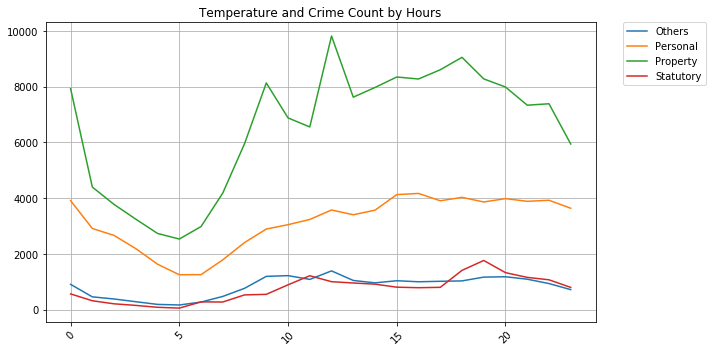

In [261]:
#plot by hours
OthDF_hr = buckets_hour[buckets_hour.columns[0]]
PersDF_hr = buckets_hour[buckets_hour.columns[1]]
PropDF_hr = buckets_hour[buckets_hour.columns[2]]
StatDF_hr = buckets_hour[buckets_hour.columns[3]]
x_hr = buckets_hour.index.tolist()

plt.figure(figsize=(10,5))
plt.plot(x_hr,OthDF_hr,label = 'Others')
plt.plot(x_hr,PersDF_hr,label = 'Personal' )
plt.plot(x_hr,PropDF_hr,label = 'Property')
plt.plot(x_hr,StatDF_hr,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime Count by Hours')
plt.grid()
plt.tight_layout()
plt.tight_layout()
plt.savefig('TempAndCrimebyHours.png')

In [235]:
#pivot by degree and hours
buckets_degree_hour = pd.pivot_table(combined_df,
                                     values='Case Number', 
                                     index='TempBucket',
                                     columns='Hour', 
                                     aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_degree_hour


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
TempBucket,,,,,,,,,,,,,,,,,,,,,
< -5 degrees,0,0,0,8,7,8,11,9,38,41,...,31,0,0,0,0,0,0,0,0,0
-5 to 4.9 degrees,50,15,16,12,21,34,47,104,140,189,...,204,231,176,97,26,0,0,0,20,18
5 to 14.9 degrees,196,139,123,102,73,76,95,148,165,220,...,302,218,218,255,367,337,276,181,159,152
15 to 24.9 degrees,424,316,289,247,198,182,274,359,599,787,...,805,764,581,559,452,458,503,445,431,428
25 to 34.9 degrees,1681,886,861,700,604,557,677,962,1415,1825,...,1681,1673,1663,1530,1572,1417,1302,1220,1244,1231
35 to 44.9 degrees,1449,1023,904,809,614,588,716,1155,1706,2280,...,1679,1895,1689,1770,2042,1884,1795,1476,1340,1171
45 to 54.9 degrees,1847,980,912,735,648,590,649,981,1366,1944,...,1972,2107,2298,1963,1786,1723,1592,1372,1632,1369
55 to 64.9 degrees,1869,1167,1040,962,805,739,893,1193,1938,2582,...,1640,1662,1692,2077,2226,2118,1901,1911,1905,1492
65 to 74.9 degrees,2805,1989,1974,1756,1399,1073,1299,1683,2114,2653,...,3484,3363,2656,2358,2447,2261,2415,2452,2237,2004


In [236]:
#why crime is so high in 65 to 74.9 degrees and when that happens?
buckets_degree65 = buckets_degree.loc['65 to 74.9 degrees']
buckets_degree65

NameError: name 'buckets_degree' is not defined